# ラズベリーパイ操作練習
### 2022/3/13 休憩後

測定で自ら取ったデータを使った操作をする前に，サンプル的なデータファイルを用いてPythonがもつ<br>
統計ツールに慣れましょう。
ここではテストとしてcsvファイルを読み込んで簡単な統計計算を試みます<br>
データは実際にラズベリーパイで取得した温度と湿度です。本日似たような
データを皆さんにも取ってもらいます<br>
25回，それぞれ数秒間隔で連続測定したものです。<br>

以下ライブラリを最初に読み込んでいます(importはライブラリを読み込むおまじない) <br>
* NumPyは数値計算に特化したライブラリ <br>
* Pandas は統計解析に必要なライブラリです <br>

csvファイルは(comma separated values)で名前の通り数字を並べたテキストファイルです。<br>
エクセルなどの表計算ソフトで読み込めますが，pandasでも読み込めます。




In [1]:
import numpy as np
import pandas as pd

# csv fileを読み込む (df=DataFrame, pandasの機能でcsvファイルを読み込む)
# ここでは元々用意されていた example_v0.csvというファイルを用いる。
df = pd.read_csv('../measure/example_v0.csv', index_col='number')

読み込んだデータはdfに格納されています。
df の最初 10行を表示してみる
中身はこのようなデータが詰まっている

In [2]:
df.head(10)

,temperature,humidity
number,,
1,24.7,27
2,24.6,28
3,24.6,28
4,24.6,28
5,24.7,27
6,24.7,30
7,24.7,29
8,24.7,29
9,24.7,29


外部ファイルを読み込まなくても自分で手書きで作る事もできます。

In [3]:
df_manual1 = pd.DataFrame({'お菓子': ["ポテトチップス","チョコレート","クッキー"],
                          '値段': [150,120,200],
                          '重さ': [400, 200, 300]})
df_manual1

,お菓子,値段,重さ
0,ポテトチップス,150,400
1,チョコレート,120,200
2,クッキー,200,300


In [4]:
a_series = ['A','B','C','D']
b_series = [10,20,30,40]
c_series = np.random.rand(4) # 4つ乱数を作ってリストに詰めなさい
my_dict = {'A':a_series, 'B':b_series, 'C':c_series}
df_manual2 = pd.DataFrame.from_dict(my_dict)
df_manual2

,A,B,C
0,A,10,0.361264
1,B,20,0.264095
2,C,30,0.242162
3,D,40,0.029041


dfに戻りましょう。グラフはこの様になります<br>
何も指定しないと両方の列を表示してしまいます。

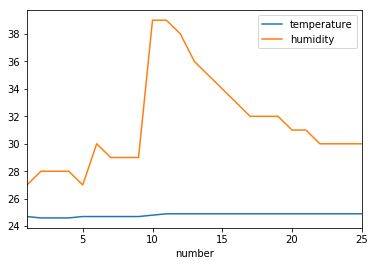

In [6]:
df.plot()

それぞれを表示するには，列名を指定します。

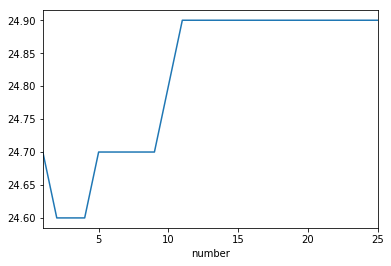

In [7]:
df.temperature.plot()

湿度に関しては棒グラフにしてみます。その他いろんなオプションに関しては，
https://note.nkmk.me/python-pandas-plot/　が参考になります。
'line','bar','barh','box','area','scatter','pie',... などあるようです。

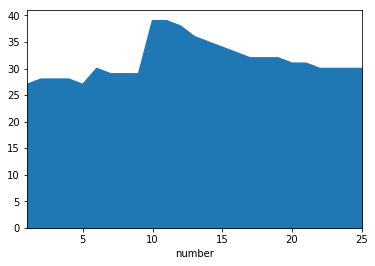

In [13]:
df.humidity.plot(kind='area')

頻度分布を作ってみましょう。

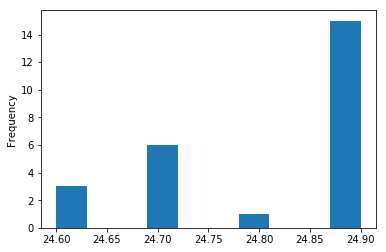

In [14]:
df.temperature.plot(kind='hist')

25回分の測定結果（温度と湿度）をそれぞれ独立にarrayにつめてみましょう。
まずは温度です。temp_arrayという名前のarrayに詰めて，その次の行ではtemp_arrayと書くだけですが，それを表示しなさいという意味ですね。

In [15]:
temp_array=np.array(df['temperature'])[:]
temp_array

array([24.7, 24.6, 24.6, 24.6, 24.7, 24.7, 24.7, 24.7, 24.7, 24.8, 24.9,
       24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9,
       24.9, 24.9, 24.9])

同様に，湿度も詰めてみましょう。

In [16]:
humidity_array=np.array(df['humidity'])[:]
humidity_array

array([27, 28, 28, 28, 27, 30, 29, 29, 29, 39, 39, 38, 36, 35, 34, 33, 32,
       32, 32, 31, 31, 30, 30, 30, 30], dtype=int64)

arrayに詰めるといろいろとできますがここでは省略。

## それぞれの平均値を見てみます
これから先，２種類の計算方法で統計情報を出していきます。<br>
* DataFrame (pandas)を使う方法,そして
* Numpyを使う方法です。

ほとんど同じことができるのですが，若干，ルールや使い勝手が違う場合があります。<br>
3種類目にはstatisticsというパッケージを使うもあるのですが，今回は割愛します。

まずは温度の平均値。DataFrameを使う方法です。

In [17]:
df.mean()

temperature    24.812
humidity       31.480
dtype: float64

片方だけ出したい場合は指定します。

In [18]:
df.mean()['humidity']

31.48

numpyを使う計算では列を指定する必要があります。

In [19]:
np.mean(humidity_array)

31.48

先程詰めたarrayでもいけます。

In [20]:
temp_array.mean()

24.812

In [21]:
humidity_array.mean()

31.48

それぞれ，小数点以下１桁にして表示したい場合は，formatを使って表示する方法があります。

In [25]:
"{:3.1F}".format(np.mean(temp_array)), "{:3.1F}".format(np.mean(humidity_array))

('24.8', '31.5')

もしくはprint()関数を使うこともできます。文章中に入れることもできるので見やすくなります。

In [26]:
print('mean of temperature is %3.1f degree' % np.mean(temp_array))
print('mean of humidity    is %3.1f percent' % np.mean(humidity_array))

mean of temperature is 24.8 degree
mean of humidity    is 31.5 percent


しばらく温度データに集中しましょう。平均値（算術平均）は出したので<br>
### 最頻値(mode)を見てみましょう。
最頻値はnumpyにはできず，pandasでないといけないようです。<br>
mode()関数を用います。<br>
DataFrame(df)を用いる方法と，PandasのSeriesを用いる方法と２つのアプローチがあります。

In [27]:
df.mode()['temperature']

0    24.9
Name: temperature, dtype: float64

In [28]:
pd.Series(temp_array).mode()

0    24.9
dtype: float64

確かに頻度分布からも24.9が一番多そうです。

### 中央値(median)を見てみましょう。

In [29]:
df.median()['temperature']

24.9

24.9ですか...まぁ上のグラフを見ると確かにそうなのかなと思います。
Seriesを使う方法でも。

In [31]:
pd.Series(temp_array).median()

24.9

こちらはNumpyでもできるようです。

In [32]:
np.median(temp_array)

24.9

### 分散（Variance)を計算してみましょう
まずはnumpyで求めてみます。np.var()を使うと(標本)分散が求まります。

In [33]:
var_np=np.var(temp_array)
print('%.7f ' % var_np)

0.0130560 


桁が多すぎますね。小数点以下2桁に絞りましょう。

In [34]:
"{:4.2F}".format(var_np)

'0.01'

DataFramesでも求めてみましょう。

In [39]:
var_df=df.var()['temperature']
print('%.7f ' % var_df)

0.0136000 


おや？違う結果が出ました。実はnumpyではvar()とすると，標本分散(normalなやつ)を，DataFrame(すなわちpandas)では<br>
何も指定していなくても不偏分散が計算されるのです。

### 不偏分散 (Unbiased Variance) と比べてみましょう
numpyでも不偏分散を計算できますが，optionが必要です。ddof=1というのを入れる必要があります。

In [38]:
uvar_np = np.var(temp_array, ddof=1)
print('%.7f ' % uvar_np)

0.0136000 


当然ですが上と同じ結果が出ています。uvarとvarの関係は正しいでしょうか？<br>
サンプル数がn=25なので，uvar_np = 25/24* var_npのはずです。<br>
どうでしょうか。

In [40]:
calc=25.0/24.0*(var_np)
print('%.7f : from var_np' % calc)
print('%.7f : uvar_np' % uvar_np)

0.0136000 : from var_np
0.0136000 : uvar_np


あっていることが確認できました。

### 標準偏差(Standard Deviation)を求めてみましょう
次に，numpyの平方根関数を用いて(標本)標準偏差sigma=sqrt(var)を計算しましょう  sqrt=平方根をとる関数

In [41]:
sigma_sqrt=np.sqrt(var_np)
print('%.7f : sigma_sqrt' % sigma_sqrt)

0.1142629 : sigma_sqrt


分散を介さずに直接求めることもできます。
numpyではstd()を関数用います。

In [42]:
sigma_np=np.std(temp_array)
print('%.7f : sigma_np' % sigma_np)

0.1142629 : sigma_np


### 不偏標準偏差
を求める場合は分散の場合と同様です。

In [43]:
print('%.7f : with numpy' % np.std(temp_array,ddof=1))
print('%.7f : with dataframe' % df.std()['temperature'])

0.1166190 : with numpy
0.1166190 : with dataframe


## 標準誤差 (Standard Error Mean)
標準偏差もできたので，最後に標準誤差をやりましょう。<br>
DataFrameのsem()関数で求めることができます。

In [44]:
sem_df=df.sem()['temperature']
print('%.7f : with sem ' % sem_df)

0.0233238 : with sem 


これはあっているのでしょうか?
試しに， sigma/sqrt(n)　も計算してみたいと思います。

In [45]:
sem_calc=df.std()['temperature']/np.sqrt(25)
print('%.7f : calculation ' % sem_calc)

0.0233238 : calculation 


合っています。つまり不偏標準偏差を用いた計算と一致しました。

## 実習１
正規分布の乱数を下記のように発生させます。分布の中心値，幅は自分で指定できます。<br>
初期値では 中心値=2.5, 幅 4.0, 乱数発生回数 25回にしています。<br>
各自好きな値にしていいです。

In [48]:
myarr=np.random.normal(loc=2.5, scale=4.0, size=10000)
df1=pd.DataFrame(data=myarr)

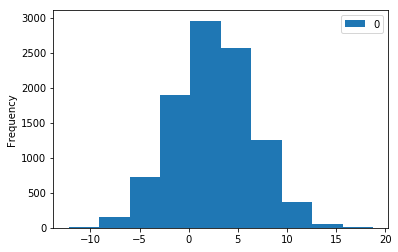

In [49]:
df1.plot(kind='hist')

（１）平均値を求めてみましょう<br>
（２）標本標準偏差と不偏標準偏差を求めてみましょう<br>
（３）発生回数が少ない場合はどちらがより設定値に近いか<br>
（４）発生回数が多くなるとどうなるか<br>

In [50]:
df1.mean()

0    2.512713
dtype: float64

In [58]:
print(df1.std(ddof=0))
print(df1.std(ddof=1))

0    4.031416
dtype: float64
0    4.031617
dtype: float64


In [59]:
df1.sem()

0    0.040316
dtype: float64

以下参考

In [ ]:
#### df1.std(ddof=0) 

In [ ]:
#### df1.std(ddof=1) 

In [ ]:
### df1.mean()

In [ ]:
### df1.sem()